# Métricas de clasificación

En el último cuaderno ajustamos un clasificador binario para predecir si los pacientes eran diabéticos o no. Usamos la precisión como una medida de qué tan bien se desempeñó el modelo, pero la precisión no lo es todo. En este cuaderno, veremos alternativas a la precisión que pueden ser mucho más útiles en el aprendizaje automático.

## Métricas alternativas para clasificadores binarios

La precisión parece una métrica sensata para evaluar (y hasta cierto punto lo es), pero debe tener cuidado al sacar demasiadas conclusiones de la precisión de un clasificador. Recuerde que es simplemente una medida de cuántos casos se predijeron correctamente. Supongamos que sólo el 3% de la población es diabética. Podría crear un clasificador que siempre solo prediga 0, y tendría una precisión del 97%, ¡pero no muy útil para identificar a los pacientes con diabetes!

Afortunadamente, hay algunas otras métricas que revelan un poco más sobre el rendimiento de nuestro modelo. Scikit-Learn incluye la capacidad de crear un *informe de clasificación* que proporciona más información que la precisión pura por sí sola.

Para comenzar, ejecute la siguiente celda para cargar nuestros datos y entrenar nuestro modelo como la última vez.

In [1]:
import pandas as pd
import wget

# load the training dataset
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv')
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

 99% [........................................................................... ] 770048 / 776415

100% [............................................................................] 776415 / 776415

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))

Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]
Accuracy:  0.7891111111111111


Uno de los lugares más simples para comenzar es un informe de clasificación. Ejecute la siguiente celda para ver una variedad de formas alternativas de evaluar nuestro modelo

In [3]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



El informe de clasificación incluye las siguientes métricas para cada clase (0 y 1)

> tenga en cuenta que es posible que la fila del encabezado no coincida con los valores.

* *Precisión*: De las predicciones que hizo el modelo para esta clase, ¿qué proporción fueron correctas?
* *Recuerde*: De todas las instancias de esta clase en el conjunto de datos de prueba, ¿cuántas identificó el modelo?
* *F1-Score*: una métrica promedio que tiene en cuenta tanto la precisión como la recuperación.
* *Soporte*: ¿Cuántas instancias de esta clase hay en el conjunto de datos de prueba?

El informe de clasificación también incluye promedios para estas métricas, incluido un promedio ponderado que permite el desequilibrio en la cantidad de casos de cada clase.

Debido a que este es un problema de clasificación *binario*, la clase ***1*** se considera *positiva* y su precisión y recuperación son particularmente interesantes; en efecto, responden las preguntas:

- De todos los pacientes que el modelo predijo que son diabéticos, ¿cuántos son realmente diabéticos?
- De todos los pacientes que en realidad son diabéticos, ¿cuántos identificó el modelo?

Puede recuperar estos valores por sí solos usando las métricas **precision_score** y **recall_score** en scikit-learn (que por defecto asumen un modelo de clasificación binaria).

In [5]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.723673792557403
Overall Recall: 0.6036988110964333


Las métricas de precisión y recuperación se derivan de cuatro posibles resultados de predicción:
* *Verdaderos positivos*: la etiqueta pronosticada y la etiqueta real son ambas 1.
* *Falsos positivos*: la etiqueta predicha es 1, pero la etiqueta real es 0.
* *Falsos negativos*: la etiqueta predicha es 0, pero la etiqueta real es 1.
* *Negativos verdaderos*: la etiqueta pronosticada y la etiqueta real son ambas 0.

Estas métricas generalmente se tabulan para el conjunto de prueba y se muestran juntas como una *matriz de confusión*, que toma la siguiente forma:

<table style="border: 1px negro sólido;">
    <tr style="border: 1px negro sólido;">
        <td style="borde: 1px negro sólido; color: negro;" bgcolor="lightgray">TN</td><td style="borde: 1px negro sólido; color: negro;" bgcolor="blanco">FP</td>
    </tr>
    <tr style="border: 1px negro sólido;">
        <td style="borde: 1px negro sólido; color: negro;" bgcolor="blanco">FN</td><td style="borde: 1px negro sólido; color: negro;" bgcolor="gris claro">TP</td>
    </tr>
</tabla>

Tenga en cuenta que las predicciones correctas (*verdaderas*) forman una línea diagonal desde la parte superior izquierda hasta la parte inferior derecha; estas cifras deberían ser significativamente más altas que las predicciones *falsas* si el modelo es bueno.

En Python, puede usar la función **sklearn.metrics.confusion_matrix** para encontrar estos valores para un clasificador entrenado:

In [7]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2637  349]
 [ 600  914]]


Hasta ahora, hemos considerado las predicciones del modelo como etiquetas de clase 1 o 0. En realidad, las cosas son un poco más complejas que eso. Los algoritmos de aprendizaje automático estadístico, como la regresión logística, se basan en la *probabilidad*; entonces, lo que realmente predice un clasificador binario es la probabilidad de que la etiqueta sea verdadera (**P(y)**) y la probabilidad de que la etiqueta sea falsa (1 - **P(y)**). Se utiliza un valor de umbral de 0,5 para decidir si la etiqueta predicha es un 1 (*P(y) > 0,5*) o un 0 (*P(y) <= 0,5*). Puedes usar el método **predict_proba** para ver los pares de probabilidad para cada caso:

In [9]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81691654 0.18308346]
 [0.96319867 0.03680133]
 [0.80878349 0.19121651]
 ...
 [0.60498669 0.39501331]
 [0.10601324 0.89398676]
 [0.63803401 0.36196599]]


La decisión de puntuar una predicción como 1 o 0 depende del umbral con el que se comparan las probabilidades pronosticadas. Si tuviéramos que cambiar el umbral, afectaría las predicciones; y por lo tanto cambiar las métricas en la matriz de confusión. Una forma común de evaluar un clasificador es examinar la tasa de verdaderos positivos (que es otro nombre para recordar) y la tasa de falsos positivos para un rango de umbrales posibles. Luego, estas tasas se trazan contra todos los umbrales posibles para formar un gráfico conocido como gráfico de características del operador recibido (ROC), como este:

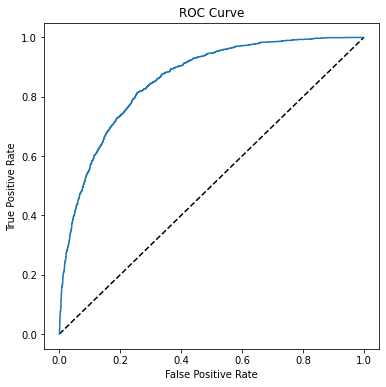

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

El gráfico ROC muestra la curva de las tasas de verdaderos y falsos positivos para diferentes valores de umbral entre 0 y 1. Un clasificador perfecto tendría una curva que sube directamente por el lado izquierdo y cruza directamente la parte superior. La línea diagonal que atraviesa el gráfico representa la probabilidad de predecir correctamente con una predicción aleatoria 50/50; por lo que obviamente desea que la curva sea más alta que eso (¡o su modelo no es mejor que simplemente adivinar!).

El área bajo la curva (AUC) es un valor entre 0 y 1 que cuantifica el rendimiento general del modelo. Cuanto más cerca de 1 sea este valor, mejor será el modelo. Una vez más, scikit-Learn incluye una función para calcular esta métrica.

In [11]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568358637091986


### Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.


In [12]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


La canalización encapsula los pasos de preprocesamiento, así como el entrenamiento del modelo.

Usemos el modelo entrenado por esta canalización para predecir etiquetas para nuestro conjunto de prueba y comparemos las métricas de rendimiento con el modelo básico que creamos anteriormente.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202436115345854


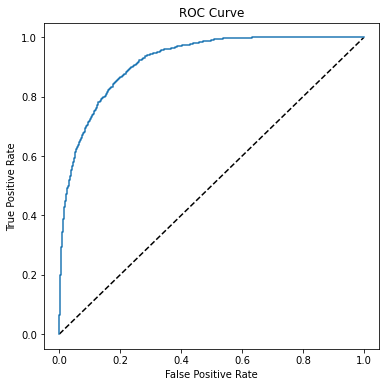

In [14]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



Los resultados se ven un poco mejores, por lo que claramente el preprocesamiento de los datos ha marcado la diferencia.

### Pruebe con un algoritmo diferente

Ahora probemos con un algoritmo diferente. Anteriormente usamos un algoritmo de regresión logística, que es un algoritmo *lineal*. Hay muchos tipos de algoritmos de clasificación que podríamos probar, entre ellos:

- **Algoritmos de Máquina de Vectores de Soporte**: Algoritmos que definen un *hiperplano* que separa clases.
- **Algoritmos basados en árboles**: algoritmos que construyen un árbol de decisión para llegar a una predicción
- **Algoritmos de conjunto**: algoritmos que combinan los resultados de varios algoritmos básicos para mejorar la generalización.

Esta vez, usaremos los mismos pasos de preprocesamiento que antes, pero entrenaremos el modelo usando un algoritmo *ensamble* llamado *Random Forest* que combina los resultados de múltiples árboles de decisión aleatorios (para obtener más detalles, consulte [Scikit -Documentación de aprendizaje](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2857  129]
 [ 186 1328]] 

Accuracy: 0.93
Overall Precision: 0.911461908030199
Overall Recall: 0.8771466314398944

AUC: 0.9829185251119048


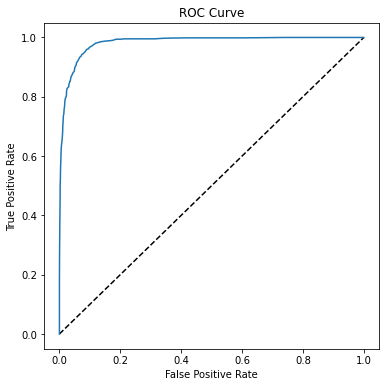

In [16]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

Cuando tenemos algunas observaciones nuevas para las que se desconoce la etiqueta, podemos cargar el modelo y usarlo para predecir valores para la etiqueta desconocida:

In [19]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1
